In [4]:
#Import dependencies
import os
import pandas as pd
import pandas_gbq
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [350]:
#Set graphing style
bg_color = 'white'
sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"black",
            "axes.grid":False,
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            'axes.labelsize':16,
            'figure.figsize':(6, 4),
            'xtick.labelsize':14,
            'font.size':14,
            'ytick.labelsize':14})

In [8]:
#Check current directory
os.getcwd()

'/Users/thor/Python/Projects/Nhanes/2015-2016'

## Upload data

In [104]:
#Upload data tables

#Demographics
Demo_2015_2016 = pd.read_sas('DEMO_I_(2015-2016).XPT')

#Apolipoprotein B
Apob_2015_2016 = pd.read_sas('APOB_I_(2015-2016).XPT')

#Body Meaurements
Body_MX_2015_2016 = pd.read_sas('BMX_I_(2015-2016).XPT')

#Blood pressure measurements
BP_2015_2016 = pd.read_sas('BPX_I_(2015-2016).XPT')

#Albumin and Creatine
ALB_CR_2015_2016 = pd.read_sas('ALB_CR_I_(2015-2016).XPT')

#Triglycerides
Triglycerides_2015_2016 = pd.read_sas('TRIGLY_I_(2015-2016).XPT')

#Glucose
Glucose_2015_2016 = pd.read_sas('GLU_I.XPT')

## Confirm data imported correctly

In [20]:
#Demo
Demo_2015_2016.head(2)

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,83732.0,9.0,2.0,1.0,62.0,NaN,3.0,3.0,1.0,NaN,...,5.0,1.0,3.0,134671.370419,135629.507405,1.0,125.0,10.0,10.0,4.39
1,83733.0,9.0,2.0,1.0,53.0,NaN,3.0,3.0,1.0,NaN,...,3.0,3.0,NaN,24328.560239,25282.425927,1.0,125.0,4.0,4.0,1.32


In [21]:
#ApoB
Apob_2015_2016.head(2)

,SEQN,WTSAF2YR,LBXAPB,LBDAPBSI
0,83733.0,54722.343330,129.0,1.29
1,83734.0,25471.093699,129.0,1.29


In [22]:
#BMX
Body_MX_2015_2016.head(2)

,SEQN,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,...,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXSAD1,BMXSAD2,BMXSAD3,BMXSAD4,BMDAVSAD,BMDSADCM
0,83732.0,1.0,94.8,NaN,NaN,NaN,NaN,NaN,184.5,NaN,...,35.9,NaN,101.1,NaN,22.9,22.7,NaN,NaN,22.8,NaN
1,83733.0,1.0,90.4,NaN,NaN,NaN,NaN,NaN,171.4,NaN,...,33.2,NaN,107.9,NaN,27.5,27.1,NaN,NaN,27.3,NaN


In [23]:
#BP
BP_2015_2016.head(2)

,SEQN,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,BPXML1,BPXSY1,...,BPAEN1,BPXSY2,BPXDI2,BPAEN2,BPXSY3,BPXDI3,BPAEN3,BPXSY4,BPXDI4,BPAEN4
0,83732.0,NaN,NaN,1.0,4.0,76.0,1.0,1.0,150.0,128.0,...,2.0,124.0,64.0,2.0,116.0,62.0,2.0,NaN,NaN,NaN
1,83733.0,NaN,NaN,1.0,4.0,72.0,1.0,1.0,170.0,146.0,...,2.0,140.0,88.0,2.0,134.0,82.0,2.0,NaN,NaN,NaN


In [24]:
#Alb CR
ALB_CR_2015_2016.head(2)

,SEQN,URXUMA,URDUMALC,URXUMS,URXUCR,URDUCRLC,URXCRS,URDACT
0,83732.0,2.5,5.397605e-79,2.5,41.0,5.397605e-79,3624.4,6.10
1,83733.0,23.2,5.397605e-79,23.2,181.0,5.397605e-79,16000.4,12.82


In [25]:
#Triglycerides
Triglycerides_2015_2016.head(2)

,SEQN,WTSAF2YR,LBXTR,LBDTRSI,LBDLDL,LBDLDLSI
0,83733.0,54722.343330,147.0,1.660,173.0,4.474
1,83734.0,25471.093699,269.0,3.037,145.0,3.750


In [105]:
#Glucose
Glucose_2015_2016.head(2)

,SEQN,WTSAF2YR,LBXGLU,LBDGLUSI
0,83733.0,54722.343330,101.0,5.59
1,83734.0,25471.093699,84.0,4.66


## Call GBQ

In [7]:
#Call GBQ

"""
1st - Call bigquery and create new dataset then tables
2nd - Upload to GBQ vis pandas-gbq
3rd - Query the data tables to pull in the necessary information
"""

#1 Call bigquery and create new dataset then tables

#Call BigQuery
from google.cloud import bigquery
from google.oauth2 import service_account

#credentials 
credentials = service_account.Credentials.from_service_account_file(
    '*****_credentials.json')

#Project id name
project_id = '*****'

#create the client
client = bigquery.Client(credentials= credentials,project=project_id)

#Create new dataset for project
DATASET_ID = 'Nhanes'
dataset_ref = client.dataset(DATASET_ID)
dataset = bigquery.Dataset(dataset_ref)
dataset.description = 'Dataset containing Nhanes data'
dataset = client.create_dataset(dataset)

## Send data to GBQ

In [106]:
#Upload tables to GBQ

#Demo
Demo_2015_2016.to_gbq(f"{DATASET_ID}.Demo_2015_2016",project_id=project_id, if_exists="replace")

#ApoB
Apob_2015_2016.to_gbq(f"{DATASET_ID}.Apob_2015_2016",project_id=project_id, if_exists="replace")

#BMX
Body_MX_2015_2016.to_gbq(f"{DATASET_ID}.Body_MX_2015_2016",project_id=project_id, if_exists="replace")

#BP
BP_2015_2016.to_gbq(f"{DATASET_ID}.BP_2015_2016",project_id=project_id, if_exists="replace")

#Alb CR
ALB_CR_2015_2016.to_gbq(f"{DATASET_ID}.ALB_CR_2015_2016",project_id=project_id, if_exists="replace")

#Triglycerides
Triglycerides_2015_2016.to_gbq(f"{DATASET_ID}.Triglycerides_2015_2016",project_id=project_id, if_exists="replace")

#Glucose
Glucose_2015_2016.to_gbq(f"{DATASET_ID}.Glucose_2015_2016",project_id=project_id, if_exists="replace")

## SQL Query #1

In [37]:
"""
Query
-----
1. Get systolic blood pressure for individuals between the ages of 20 and 80
"""

#Query
sql = """
WITH BP AS (SELECT A.SEQN, A.BPXSY1 AS sys_bp
            FROM `Nhanes.BP_2015_2016` as A),
            
AG AS (SELECT B.SEQN, B.RIDAGEYR AS age_yr
             FROM `Nhanes.Demo_2015_2016` as B
             WHERE B.RIDAGEYR BETWEEN 20 AND 80)
             
SELECT BP.SEQN AS id, BP.sys_bp AS sys_bp, 
         AG.age_yr AS age_yr
FROM BP
INNER JOIN AG
ON BP.SEQN = AG.SEQN
  """

#We will imput the data from the query and re-create the dataframe we created earlier
BP_20_80 = pd.read_gbq(sql, dialect='standard', project_id=project_id)


In [38]:
#Display table
BP_20_80.head()

,id,sys_bp,age_yr
0,83874.0,NaN,54.0
1,83959.0,NaN,22.0
2,83985.0,NaN,55.0
3,83992.0,NaN,68.0
4,83999.0,NaN,71.0


## SQL Query #2

In [72]:
#Perform same query but remove non-null values
"""
Query
-----
1. Get systolic blood pressure for individuals between the ages of 20 and 80
2. Non-Null values only
"""

#Query
sql = """
WITH BP AS (SELECT A.SEQN, A.BPXSY1 AS sys_bp
            FROM `Nhanes.BP_2015_2016` as A
            WHERE A.BPXSY1 IS NOT NULL),
            
AG AS (SELECT B.SEQN, B.RIDAGEYR AS age_yr
             FROM `Nhanes.Demo_2015_2016` as B
             WHERE B.RIDAGEYR BETWEEN 20 AND 100
             AND B.RIDAGEYR IS NOT NULL) 
             
SELECT BP.SEQN AS id, BP.sys_bp AS sys_bp, 
         AG.age_yr AS age_yr
FROM BP
INNER JOIN AG
ON BP.SEQN = AG.SEQN
  """

#We will imput the data from the query and re-create the dataframe we created earlier
BP_20_100_nonnull = pd.read_gbq(sql, dialect='standard', project_id=project_id)

In [73]:
BP_20_80_nonnull.head()

,id,sys_bp,age_yr,age_group
0,85204.0,104.0,20.0,twenty
1,86159.0,118.0,20.0,twenty
2,86970.0,130.0,20.0,twenty
3,88192.0,124.0,20.0,twenty
4,89508.0,108.0,20.0,twenty


In [89]:
#Create bins
BP_20_80_nonnull['age_group'] = BP_20_80_nonnull['age_yr'].apply(lambda x: 'twenty' if x <=40 else
                                                                ('forty' if 40 < x <= 60 else 'sixty'))

## Plot data by age groupings

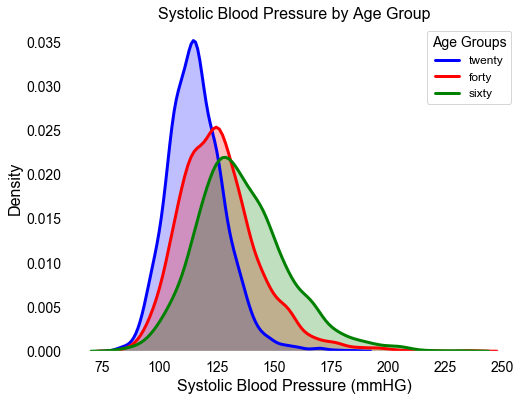

In [194]:
#Plot the age distributions

age_groups = list(BP_20_80_nonnull['age_group'].unique())

plt.figure(figsize=(8,6))
for group in age_groups:
    subset = BP_20_100_nonnull[BP_20_80_nonnull['age_group']==group]
    
    if group == 'twenty':
        sns.distplot(subset["sys_bp"], 
                     hist = False, kde = True, 
                     kde_kws = {'shade': True, 'linewidth': 3},
                     label = group,
                     color = "blue")
    
    elif group == 'forty':
        sns.distplot(subset["sys_bp"], 
                     hist = False, kde = True, 
                     kde_kws = {'shade': True, 'linewidth': 3},
                     label = group,
                     color = "red")
    else:
        sns.distplot(subset["sys_bp"], 
                     hist = False, kde = True, 
                     kde_kws = {'shade': True, 'linewidth': 3},
                     label = group,
                     color = "green")
        

# Plot formatting
plt.legend(prop={'size': 12}, title = 'Age Groups')
plt.title('Systolic Blood Pressure by Age Group', fontdict={'fontsize':16})
plt.xlabel('Systolic Blood Pressure (mmHG)')
plt.ylabel('Density')


plt.show()

## SQL #3 to group patients by blood pressure classification

In [152]:
#Query
"""
Query
-----
1. Get systolic blood pressure for individuals between the ages of 20 and 80
2. Get GENDER, WEIGHT, RACE, LDL-TRIGLYCERIDES, FASTING GLUCOSE LEVELS, APOB LEVELs
3. Create new columns labeling indviduals as hypertensive or not (x >= 140 as hypertensive (coded as 1))
4. Recode RACE and GENDER to string values
4. Non-Null Values for systolic blood pressure
"""

#Query
sql = """
WITH BP AS (SELECT SEQN AS id, BPXSY1 AS sys_bp,
              (CASE 
                WHEN BPXSY1 >= 140 THEN 'Hypertensive' 
                WHEN BPXSY1 BETWEEN 130 AND 140 THEN 'Pre-Hypertensive'
                ELSE 'Normotensive'
               END) AS HTN
            FROM `Nhanes.BP_2015_2016`
            WHERE BPXSY1 IS NOT NULL)
SELECT HTN, COUNT(HTN) AS Counts
FROM BP
GROUP BY HTN
  """

#We will imput the data from the query and re-create the dataframe we created earlier
BP_classification = pd.read_gbq(sql, dialect='standard', project_id=project_id)

In [161]:
#Create percentage column
BP_classification['Percentage'] = (BP_classification['Counts']/np.sum(BP_classification['Counts'])*100)

In [162]:
BP_classification

,HTN,Counts,Percentage
0,Normotensive,5249,73.463961
1,Hypertensive,1024,14.331700
2,Pre-Hypertensive,872,12.204339


## Plot

[Text(0, 0, 'Normotensive'),
 Text(1, 0, 'Hypertensive'),
 Text(2, 0, 'Pre-Hypertensive')]

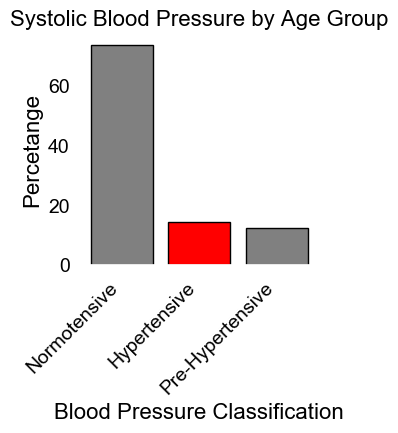

In [373]:
#Plot
plt.figure(figsize=(3,3))
ax =sns.barplot(x='HTN', y='Percentage',data=BP_classification, 
                                palette=['grey','red','grey'],
                                saturation=1,
                                linewidth=1,
                                edgecolor=(0,0,0))

plt.title('Systolic Blood Pressure by Age Group', fontdict={'fontsize':16})
plt.xlabel('Blood Pressure Classification')
plt.ylabel('Percetange')
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

## SQL Query #4 - Multiple tables 

In [109]:
#Query
"""
Query
-----
1. Get systolic blood pressure for individuals between the ages of 20 and 80
2. Get GENDER, WEIGHT, RACE, LDL-TRIGLYCERIDES, FASTING GLUCOSE LEVELS, APOB LEVELs
3. Create new columns labeling indviduals as hypertensive or not (x >= 140 as hypertensive (coded as 1))
4. Recode RACE and GENDER to string values
5. Non-Null Values for systolic blood pressure
"""

#Query
sql = """
WITH BP AS (SELECT SEQN AS id, BPXSY1 AS sys_bp,
              (CASE 
                WHEN BPXSY1 > 140 THEN 1 
                ELSE 0
               END) AS HTN
            FROM `Nhanes.BP_2015_2016`
            WHERE BPXSY1 IS NOT NULL),
            
AGE_RACE_GEN AS (SELECT SEQN AS id, RIDAGEYR AS age,
                  (CASE
                     WHEN RIDRETH1 = 1 THEN 'mexican'
                     WHEN RIDRETH1 = 2 THEN 'other_hispanic'
                     WHEN RIDRETH1 = 3 THEN 'white'
                     WHEN RIDRETH1 = 4 THEN 'black'
                     WHEN RIDRETH1 = 5 THEN 'multiracial'
                     ELSE 'missing'
                   END) AS race,
                   (CASE
                      WHEN RIAGENDR = 1 THEN 'male'
                      WHEN RIAGENDR = 2 THEN 'female'
                      ELSE 'missing'
                     END) AS gender
                  FROM `Nhanes.Demo_2015_2016`),

WEIGHT AS (SELECT SEQN AS id, BMXWT AS weight_kg
            FROM `Nhanes.Body_MX_2015_2016`),

TRIGLYCERIDE AS (SELECT SEQN AS id, LBXTR AS trig
                 FROM `Nhanes.Triglycerides_2015_2016`),
    
GLUCOSE AS (SELECT SEQN AS id, LBXGLU AS glu
            FROM `Nhanes.Glucose_2015_2016`),
            
APOB AS (SELECT SEQN AS id, LBXAPB AS apob
         FROM `Nhanes.Apob_2015_2016` )
                    
SELECT BP.id AS id, BP.sys_bp AS sys_bp, BP.HTN,
       AGE_RACE_GEN.age AS age, AGE_RACE_GEN.race AS race, AGE_RACE_GEN.gender AS gender,
       WEIGHT.weight_kg AS weight_kg,
       TRIGLYCERIDE.trig AS trig,
       GLUCOSE.glu AS glu,
       APOB.apob AS apob
FROM BP
LEFT OUTER JOIN  AGE_RACE_GEN 
ON BP.id = AGE_RACE_GEN.id 
LEFT OUTER JOIN WEIGHT 
ON BP.id = WEIGHT.id 
LEFT OUTER JOIN TRIGLYCERIDE 
ON BP.id = TRIGLYCERIDE.id 
LEFT OUTER JOIN GLUCOSE 
ON BP.id = GLUCOSE.id 
LEFT OUTER JOIN APOB 
ON BP.id = APOB.id 
  """

#We will imput the data from the query and re-create the dataframe we created earlier
BP_df = pd.read_gbq(sql, dialect='standard', project_id=project_id)

In [110]:
BP_df.head()

,id,sys_bp,HTN,age,race,gender,weight_kg,trig,glu,apob
0,91143.0,100.0,0,9.0,white,female,29.2,NaN,NaN,NaN
1,91936.0,92.0,0,9.0,multiracial,female,27.5,NaN,NaN,NaN
2,90313.0,114.0,0,9.0,white,male,43.8,NaN,NaN,NaN
3,88894.0,128.0,0,21.0,black,male,78.0,73.0,91.0,116.0
4,93553.0,100.0,0,9.0,mexican,male,29.6,NaN,NaN,NaN


In [195]:
sns.set()

In [225]:
BP_df.head()

,id,sys_bp,HTN,age,race,gender,weight_kg,trig,glu,apob
0,91143.0,100.0,0,9.0,white,female,29.2,NaN,NaN,NaN
1,91936.0,92.0,0,9.0,multiracial,female,27.5,NaN,NaN,NaN
2,90313.0,114.0,0,9.0,white,male,43.8,NaN,NaN,NaN
3,88894.0,128.0,0,21.0,black,male,78.0,73.0,91.0,116.0
4,93553.0,100.0,0,9.0,mexican,male,29.6,NaN,NaN,NaN


In [235]:
gender_dist = BP_df.groupby(['gender','HTN'],as_index=False).agg({'race':'count'})
gender_dist

,gender,HTN,race
0,female,0,3201
1,female,1,446
2,male,0,3024
3,male,1,474


<function matplotlib.pyplot.show(*args, **kw)>

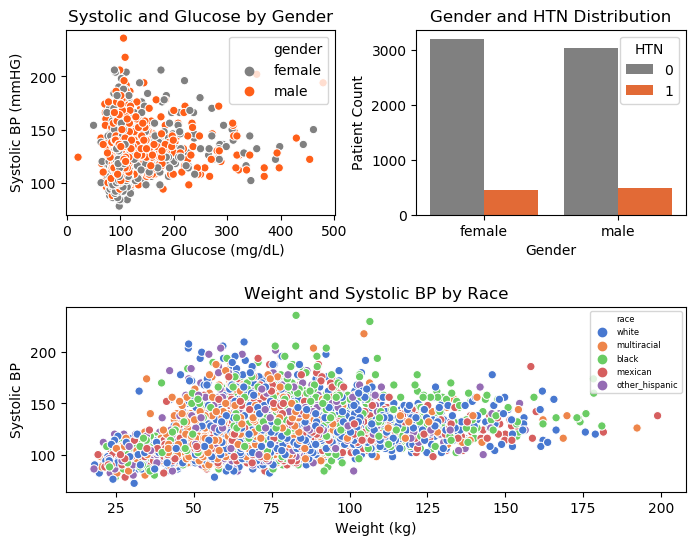

In [379]:
# linear
plt.style.use("default") 
fig = plt.figure(figsize=(8,6))
ax1 = plt.subplot(221)
ax1 = sns.scatterplot(x='glu', y='sys_bp', data=BP_df, hue='gender', palette=['grey','#FF5F19'])
ax1.set(xlabel="Plasma Glucose (mg/dL)",ylabel="Systolic BP (mmHG)", title="Systolic and Glucose by Gender")

plt.subplot(222)
ax2 = sns.barplot(x='gender', y='race', hue='HTN', data=gender_dist, palette=['grey','#FF5F19'])
ax2.set(xlabel="Gender",ylabel="Patient Count", title="Gender and HTN Distribution")

plt.subplot(212)
#ax3 = sns.regplot(x='age', y='HTN', data=BP_df, logistic=True)
ax3 = sns.scatterplot(x='weight_kg', y='sys_bp', data=BP_df, hue='race', palette="muted")
ax3.set(xlabel="Weight (kg)",ylabel="Systolic BP", title="Weight and Systolic BP by Race")
ax3.legend(loc=1, prop={'size': 6})

fig.subplots_adjust(wspace=.3)
fig.subplots_adjust(hspace=.5)
plt.show

## SQL Query #5 with random date dataset

In [338]:
#Create random dates
import random
dates_1=[]
for i in range(1,2):
    for j in range(1,29):
        if j < 10:
            date = f'2019-{i:02d}-{j:02d}'
        else:
            date = f'2019-{i:02d}-{j:02d}'
        dates_1.append(date)
        
dates_2=[]
for i in range(2,3):
    for j in range(1,29):
        if j < 10:
            date = f'2019-{i:02d}-{j:02d}'
        else:
            date = f'2019-{i:02d}-{j:02d}'
        dates_2.append(date)

In [339]:
random.shuffle(dates_1)
random.shuffle(dates_2)

In [340]:
df_dates = pd.DataFrame({'_begin':dates_1, '_end':dates_2})

In [341]:
df_dates['item'] = range(1,len(df_dates['_begin'])+1,)

In [342]:
#Dates
df_dates.to_gbq(f"{DATASET_ID}.Dates",project_id=project_id, if_exists="replace")

### Query

In [344]:
#Query
"""
Query
-----
1. Select item, beginning date, end date
2. Get difference, in days, between begin and end dates
3. Get difference, in months, between begin and end dates
4. Add future end date, which is 5 months from end date
5. Extract the month from the begin date
6. Make a name column that lists the name of the beginning month
"""

#Query
sql = """
WITH A AS(SELECT item, _begin, _end,
          DATE_DIFF(CAST(_end AS DATE), CAST(_begin AS DATE), DAY) AS work_time_days,
          DATE_DIFF(CAST(_end AS DATE), CAST(_begin AS DATE), MONTH) AS work_time_months,
          DATE_ADD(CAST(_end AS DATE), INTERVAL 5 MONTH) AS future_end,
          EXTRACT (MONTH FROM CAST(_begin AS DATE)) AS _begin_mon
          FROM `Nhanes.Dates`)
SELECT A.*, 
      (CASE
          WHEN A._begin_mon = 1 THEN 'JAN'
          ELSE 'FEB'
          END) AS _begin_mon_name
FROM A
  """

#We will imput the data from the query and re-create the dataframe we created earlier
dates = pd.read_gbq(sql, dialect='standard', project_id=project_id)

In [346]:
dates.head()

,item,_begin,_end,work_time_days,work_time_months,future_end,_begin_mon,_begin_mon_name
0,1,2019-01-03,2019-02-20,48,1,2019-07-20,1,JAN
1,2,2019-01-11,2019-02-01,21,1,2019-07-01,1,JAN
2,3,2019-01-24,2019-02-24,31,1,2019-07-24,1,JAN
3,4,2019-01-15,2019-02-02,18,1,2019-07-02,1,JAN
4,5,2019-01-22,2019-02-03,12,1,2019-07-03,1,JAN
